In [1]:
from __future__ import print_function

import sys
import os
from glob import glob
from time import time
%matplotlib inline
#%load_ext autoreload
#%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import tables as tb
import numpy as np
import math
#plt.rcParams['figure.figsize'] = 10,8
import datetime

from   invisible_cities.database import load_db
from   invisible_cities.core.system_of_units_c import SystemOfUnits
import invisible_cities.sierpe.blr as blr
import invisible_cities.core.mpl_functions as mpl
import invisible_cities.reco.wfm_functions as wfm
import invisible_cities.reco.tbl_functions as tbl
import invisible_cities.core.peak_functions_c as cpf
import invisible_cities.reco.pmaps_functions as pf
import invisible_cities.core.sensor_functions as sf
from   invisible_cities.core.core_functions import define_window

import invisible_cities.core.pmaps_functions_c as cpm
from   invisible_cities.core.core_functions import lrange
 
units = SystemOfUnits()
t0 = time()

In [2]:
#import S1S2prop as prop
#import plotting as plot

In [3]:
#%%
mydf_file = os.environ['IC_DATA']+'/pmaps_JM_NEW/Kr/dst_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar_pmaps_10000.root.h5'
#mydf_file = os.environ['IC_DATA']+'/irene/Kr/pmaps_NEXT_v0_08_09_Kr_ACTIVE_55_0_7bar__10000.root.h5'
#mydf_file = os.environ['IC_DATA']+'/irene/Co/pmaps_NEXT_v0_08_09_Co56_INTERNALPORTANODE_102_0_7bar__10000.root.h5'
print(mydf_file)

mydf = pf.read_pmaps(mydf_file)
#mydf
list(map(type, mydf))
S1df   = mydf[0]
S2df   = mydf[1]
S2Sidf = mydf[2]
print('S1df entries (tbins x events):',len(S1df))
print('S2df entries (tbins x events):',len(S2df))
print('S2Sidf entries:',len(S2Sidf))
type(S1df)
print('Keys of S1df panda dataframe: {} '.format(S1df.keys()))
print('Keys of S2df panda dataframe: {} '.format(S2df.keys()))
print('Keys of S2Sidf panda dataframe: {} '.format(S2Sidf.keys()))

# Convert S12df object  (an S12 pytable read as a PD dataframe) and return an S12L dictionary (list of dict, first dict)
S1dict = pf.df_to_pmaps_dict(S1df,10000)
S2dict = pf.df_to_pmaps_dict(S2df,10000)


evid_S1min = sorted(S1dict.keys())[0]
evid_S1max = sorted(S1dict.keys())[-1]
evid_S2min = sorted(S2dict.keys())[0]
evid_S2max = sorted(S2dict.keys())[-1]
print('First/last event ID (first item in sorted S1 dictionary): {}/{}'.format(evid_S1min,evid_S1max))
print('First/last event ID (first item in sorted S2 dictionary): {}/{}'.format(evid_S2min,evid_S2max))
print('Total number of events in S1 = {}'.format(len(S1dict)))
print('Total number of events in S2 = {}'.format(len(S2dict)))
len(S1dict), type(S1dict), len(S2dict), type(S2dict)




/Users/neus/InvCities/data/pmaps_JM_NEW/Kr/dst_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar_pmaps_10000.root.h5
S1df entries (tbins x events): 62893
S2df entries (tbins x events): 90708
S2Sidf entries: 409626
Keys of S1df panda dataframe: Index(['event', 'peak', 'time', 'ene'], dtype='object') 
Keys of S2df panda dataframe: Index(['event', 'peak', 'time', 'ene'], dtype='object') 
Keys of S2Sidf panda dataframe: Index(['event', 'peak', 'nsipm', 'ene'], dtype='object') 
First/last event ID (first item in sorted S1 dictionary): 0/9998
First/last event ID (first item in sorted S2 dictionary): 0/9998
Total number of events in S1 = 9420
Total number of events in S2 = 9984


(9420,
 invisible_cities.reco.pmap_io.S12,
 9984,
 invisible_cities.reco.pmap_io.S12)

In [4]:
#S1dict

In [5]:
#table_pmaps = tb.open_file(mydf_file,'r')

In [6]:
#table_pmaps

In [7]:
#S1 = table_pmaps.root.PMAPS.S1

In [8]:
#pd.DataFrame.from_records(S1.read())

In [9]:
#table_pmaps.root.PMAPS.S1

In [10]:
#table_pmaps

## Open MCRD file to extract MCTrack info

In [11]:
pytable_file = os.environ['IC_DATA']+'/pmaps_JM_NEW/Kr/dst_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar_pmaps_10000.root.h5'
#pytable_file = os.environ['IC_DATA']+'/MCRD/Kr/dst_NEXT_v0_08_09_Kr_ACTIVE_55_0_7bar_MCRD_10000.root.h5'
pytable_file = os.environ['IC_DATA']+'/pmaps_JM_NEW/Kr/dst_NEXT_v0_08_09_Kr_ACTIVE_10_0_7bar_pmaps_10000.root.h5'

In [12]:
pytable_file

'/Users/neus/InvCities/data/pmaps_JM_NEW/Kr/dst_NEXT_v0_08_09_Kr_ACTIVE_10_0_7bar_pmaps_10000.root.h5'

In [13]:
table = tb.open_file(pytable_file,mode='r')

In [14]:
#table

In [15]:
table.root.MC.MCTracks

/MC/MCTracks (Table(69837,), shuffle, zlib(4)) 'MCTracks'
  description := {
  "event_indx": Int16Col(shape=(), dflt=0, pos=0),
  "mctrk_indx": Int16Col(shape=(), dflt=0, pos=1),
  "particle_name": StringCol(itemsize=10, shape=(), dflt=b'', pos=2),
  "pdg_code": Int16Col(shape=(), dflt=0, pos=3),
  "initial_vertex": Float32Col(shape=(3,), dflt=0.0, pos=4),
  "final_vertex": Float32Col(shape=(3,), dflt=0.0, pos=5),
  "momentum": Float32Col(shape=(3,), dflt=0.0, pos=6),
  "energy": Float32Col(shape=(), dflt=0.0, pos=7),
  "nof_hits": Int16Col(shape=(), dflt=0, pos=8),
  "hit_indx": Int16Col(shape=(), dflt=0, pos=9),
  "hit_position": Float32Col(shape=(3,), dflt=0.0, pos=10),
  "hit_time": Float32Col(shape=(), dflt=0.0, pos=11),
  "hit_energy": Float32Col(shape=(), dflt=0.0, pos=12)}
  byteorder := 'little'
  chunkshape := (819,)

In [16]:
#table.root.Run.events

In [17]:
b = table.root.MC.MCTracks
a = b[:]

In [18]:
a['event_indx'][0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2], dtype=int16)

In [19]:
type(b)

tables.table.Table

In [20]:
type(b[:])

numpy.ndarray

In [21]:
b[0]

(0, 0, b'e-', 11, [70.34581756591797, -37.00787353515625, 345.2931823730469], [70.33417510986328, -37.01640319824219, 345.3054504394531], [-0.06322100013494492, -0.03542151674628258, 0.06662880629301071], 0.00939599983394146, 2, 0, [70.33509063720703, -37.013885498046875, 345.30450439453125], 0.0002945603337138891, 0.006669693160802126)

In [22]:
b[0]

(0, 0, b'e-', 11, [70.34581756591797, -37.00787353515625, 345.2931823730469], [70.33417510986328, -37.01640319824219, 345.3054504394531], [-0.06322100013494492, -0.03542151674628258, 0.06662880629301071], 0.00939599983394146, 2, 0, [70.33509063720703, -37.013885498046875, 345.30450439453125], 0.0002945603337138891, 0.006669693160802126)

In [23]:
b[1]

(0, 0, b'e-', 11, [70.34581756591797, -37.00787353515625, 345.2931823730469], [70.33417510986328, -37.01640319824219, 345.3054504394531], [-0.06322100013494492, -0.03542151674628258, 0.06662880629301071], 0.00939599983394146, 2, 1, [70.33417510986328, -37.01640319824219, 345.3054504394531], 0.0003867837367579341, 0.0027263066731393337)

## suma de hits es mayor que la energía

In [24]:
(0.005795191042125225+0.0036008090246468782) > 0.00939599983394146

True

In [25]:
0.005795191042125225+0.0036008090246468782-0.00939599983394146

2.3283064365386963e-10

In [26]:
b[0]== b[1]

False

In [27]:
b[2] == b[3]

False

In [28]:
len(b) 

69837

In [29]:
#a = b[:]

In [30]:
type(a)

numpy.ndarray

In [31]:
len(a)

69837

In [32]:
a.shape

(69837,)

In [33]:
type(a['mctrk_indx']) 

numpy.ndarray

In [34]:
a['momentum'][0]

array([-0.063221  , -0.03542152,  0.06662881], dtype=float32)

In [35]:
a['event_indx'][0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int16)

In [36]:
len(a['momentum'])

69837

In [37]:
a['momentum'].shape == (69063, 3)

False

In [38]:
a['mctrk_indx'].shape

(69837,)

In [39]:
a['initial_vertex'][0]

array([  70.34581757,  -37.00787354,  345.29318237], dtype=float32)

In [40]:
a['event_indx'][0:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6], dtype=int16)

In [41]:
a

array([ (0, 0, b'e-', 11, [70.34581756591797, -37.00787353515625, 345.2931823730469], [70.33417510986328, -37.01640319824219, 345.3054504394531], [-0.06322100013494492, -0.03542151674628258, 0.06662880629301071], 0.00939599983394146, 2, 0, [70.33509063720703, -37.013885498046875, 345.30450439453125], 0.0002945603337138891, 0.006669693160802126),
       (0, 0, b'e-', 11, [70.34581756591797, -37.00787353515625, 345.2931823730469], [70.33417510986328, -37.01640319824219, 345.3054504394531], [-0.06322100013494492, -0.03542151674628258, 0.06662880629301071], 0.00939599983394146, 2, 1, [70.33417510986328, -37.01640319824219, 345.3054504394531], 0.0003867837367579341, 0.0027263066731393337),
       (0, 1, b'e-', 11, [70.34581756591797, -37.00787353515625, 345.2931823730469], [70.33882904052734, -36.93152618408203, 345.0984191894531], [0.05445895344018936, 0.07797137647867203, -0.15761537849903107], 0.032147299498319626, 6, 0, [70.37931823730469, -36.959903717041016, 345.19622802734375], 0.001

In [42]:
from collections import namedtuple
def xxx (mctruth_table, max_events=None):
    
    result = {}
    Tuple = namedtuple('sipms','momentum, position, energies, hit_energies')
    len_mc_truth_table = len(mctruth_table)

#    convert table to numpy.ndarray
    data       = mctruth_table[:]
    data_size  = len(data)

    event            =  data["event_indx"]
    particle         =  data["mctrk_indx"]
    particle_name    =  data["particle_name"]
    pdg_code         =  data["pdg_code"]
    initial_vertex   =  data["initial_vertex"]
    final_vertex     =  data["final_vertex"]
    momentum         =  data["momentum"]
    energy           =  data["energy"]
    nof_hits         =  data["nof_hits"]
    hit              =  data["hit_indx"]
    hit_position     =  data["hit_position"]
    hit_time         =  data["hit_time"]
    hit_energy       =  data["hit_energy"]

    event_boundary    = True
    particle_boundary = True
    hit_boundary      = True

    current_event    = -2
    current_particle = -1
    current_hit      = -1

    limit = np.iinfo(int).max if max_events is None or max_events < 0 else max_events
    
    for i in range(data_size):
       # print('+++++++++start loop = {}, event= {}, particle= {}, hit= {}'.format(i,event[i], particle[i], hit[i]))
        
        if(event_boundary):    # start new event
            current_event = event[i]
            #print('-----current event= {}'.format(current_event))
            if current_event >= limit: break
            event_data = {}

        if particle_boundary:  # Start new particle
            current_particle = particle[i]
            particle_data = {}

        if hit_boundary:  # Start new hit
            current_hit = hit[i]
            momentums, hit_positions, energies, hit_energies = [], [], [], []
           
           

       # Add position, momentum to current particle's data  
       
        momentums     .append(momentum    [i])
        hit_positions .append(hit_position[i])
        energies      .append(energy      [i])
        hit_energies  .append(hit_energy  [i])
      
        #print(momentum)

        event_boundary     = i+1 == data_size     or event     [i+1] != current_event
        particle_boundary  = event_boundary       or particle [i+1]  != current_particle
        hit_boundary       = particle_boundary    or hit      [i+1]  != current_hit
        
        if hit_boundary:  # End of hit: save it
            particle_data[current_hit] = Tuple(np.array(momentums), 
                                               np.array(hit_positions), 
                                               np.array(energies), 
                                               np.array(hit_energies))
            
        if particle_boundary:  # End of particle: save it
            #print('end of particle')
            event_data[current_particle] = particle_data


        if event_boundary: # End of event: save it
            #print('end of event')
            result[current_event] = event_data
       
    
    return result




### Max events: revisar. Corre hasta el evento siguiente

In [43]:
x = xxx(a)

In [44]:
x[0][0][0].momentum

array([[-0.063221  , -0.03542152,  0.06662881]], dtype=float32)

In [45]:
x[0][0][0].position

array([[  70.33509064,  -37.0138855 ,  345.30450439]], dtype=float32)

In [46]:
type(x[0][0][0].position[0])

numpy.ndarray

In [47]:
type(x[0][0][0].hit_energies)

numpy.ndarray

In [48]:
x[0][0][0].hit_energies

array([ 0.00666969], dtype=float32)

In [49]:
x[0][0][0].energies

array([ 0.009396], dtype=float32)

### Dictionary: {event: {particle: {hit: [momentums, position, energies]}}}

In [50]:
x[0]

{0: {0: sipms(momentum=array([[-0.063221  , -0.03542152,  0.06662881]], dtype=float32), position=array([[  70.33509064,  -37.0138855 ,  345.30450439]], dtype=float32), energies=array([ 0.009396], dtype=float32), hit_energies=array([ 0.00666969], dtype=float32)),
  1: sipms(momentum=array([[-0.063221  , -0.03542152,  0.06662881]], dtype=float32), position=array([[  70.33417511,  -37.0164032 ,  345.30545044]], dtype=float32), energies=array([ 0.009396], dtype=float32), hit_energies=array([ 0.00272631], dtype=float32))},
 1: {0: sipms(momentum=array([[ 0.05445895,  0.07797138, -0.15761538]], dtype=float32), position=array([[  70.37931824,  -36.95990372,  345.19622803]], dtype=float32), energies=array([ 0.0321473], dtype=float32), hit_energies=array([ 0.00700235], dtype=float32)),
  1: sipms(momentum=array([[ 0.05445895,  0.07797138, -0.15761538]], dtype=float32), position=array([[  70.34996796,  -36.90391922,  345.15142822]], dtype=float32), energies=array([ 0.0321473], dtype=float32), hi

In [51]:
class T_S2SiProp:
    """
    properties
    """        
    
    def __init__(self, Tdict):
        self.Tdict    = Tdict
        self.length   = len(self.Tdict)
        self.prop()

    def dict(self):
            return self.Tdict


    def prop(self):
        self.xposition        = np.zeros(self.length, dtype=np.double) # 
        self.yposition        = np.zeros(self.length, dtype=np.double) # 
        self.energies         = np.zeros(self.length, dtype=np.double) # Particle's energy
        self.hit_energies     = np.zeros(self.length, dtype=np.double) # hit's energy
        self.edepo            = np.zeros(self.length, dtype=np.double) # Sum of energy_hits
        self.xtruth           = np.zeros(self.length, dtype=np.double) # x from barycenter
        self.ytruth           = np.zeros(self.length, dtype=np.double) # y from barycenter
        
        
        lxposition      = []
        lyposition      = []
        lenergies       = []
        lhit_energies   = []
        ledepo          = []
        lx              = []
        ly              = []
    
        energies = 0 
        for evtID, evt in self.Tdict.items(): 
            edepo = 0
            xsi   = []
            ysi   = []
            hitE  = []
            for particle, hits in evt.items(): 
                # fill energy of particles               
                for hitID, sipms in hits.items(): 
                    edepo = edepo + sipms.hit_energies               
                    lxposition    .append(sipms.position[0][0])
                    lyposition    .append(sipms.position[0][1])
                    lhit_energies .append(sipms.hit_energies)
                    ledepo        .append(edepo)
                    energies      = sipms.energies
                    xsi           .append(sipms.position[0][0])  
                    ysi           .append(sipms.position[0][1])
                    hitE          .append(sipms.hit_energies[0])
                    #print('xsi = {}'.format(xsi))
                    #print('ysi = {}'.format(ysi))
                    #print('hitE = {}'.format(hitE))
                    #print('sipms.hit_energies = {}'.format(sipms.hit_energies[0]))
                    #print('sipms.position[0][0] = {}'.format(sipms.position[0][0]))
                    
                
                # fill energy of particles 
                lenergies     .append(energies)  
           
            #fill weighted average per event
            xarray = np.array(xsi)
            yarray = np.array(ysi)
            Earray = np.array(hitE)
           # print('lenght E= {}, type = {}'.format(len(Earray), Earray.shape))
           # print(xarray)
           # print(Earray)
           # print('lenght x= {}, type = {}'.format(len(xarray), xarray.shape))
           # print('lenght y= {}, type = {}'.format(len(yarray), yarray.shape))
           # print('+++++++++++++++++++++++++++++')
            lx  .append(np.average(xarray, weights = Earray))
            ly  .append(np.average(yarray, weights = Earray))
            
            #print('+++++++++++++++++++++++++++++')
                
                
       # convert lists to numpy arrays
        self.xposition      = np.array(lxposition)  
        self.yposition      = np.array(lyposition)
        self.energies       = np.array(lenergies)
        self.hit_energies   = np.array(lhit_energies)
        self.edepo          = np.array(ledepo)
        self.xtruth         = np.array(lx)
        self.ytruth         = np.array(ly)


In [52]:
T = T_S2SiProp(x)

(array([  533.,   889.,  1141.,  1214.,  1232.,  1303.,  1175.,  1106.,
          864.,   542.]),
 array([-197.7361145 , -158.23493195, -118.73374939,  -79.23256683,
         -39.73138428,   -0.23020172,   39.27098083,   78.77216339,
         118.27334595,  157.7745285 ,  197.27571106]),
 <a list of 10 Patch objects>)

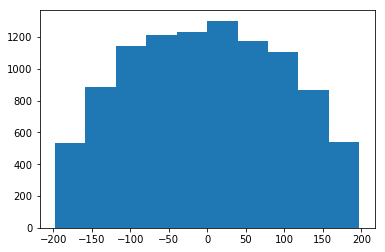

In [53]:
plt.hist(T.xtruth)

(array([  543.,   943.,  1061.,  1277.,  1223.,  1274.,  1218.,  1081.,
          866.,   513.]),
 array([ -1.97504013e+02,  -1.57984462e+02,  -1.18464911e+02,
         -7.89453598e+01,  -3.94258087e+01,   9.37423706e-02,
          3.96132935e+01,   7.91328445e+01,   1.18652396e+02,
          1.58171947e+02,   1.97691498e+02]),
 <a list of 10 Patch objects>)

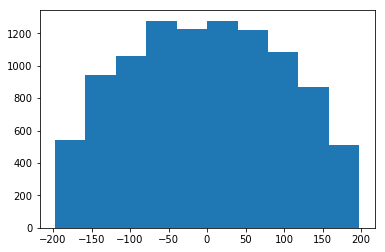

In [54]:
plt.hist(T.ytruth)

In [55]:
len(x)

9999

In [56]:
len(T.xposition)

69837

In [57]:
len(T.hit_energies) == len(T.yposition)

True

In [58]:
T.xposition

array([ 70.33509064,  70.33417511,  70.37931824, ...,  19.2985878 ,
        19.26343346,  19.27990913], dtype=float32)

In [59]:
T.yposition

array([-37.0138855 , -37.0164032 , -36.95990372, ...,  67.36771393,
        67.35923004,  67.3478241 ], dtype=float32)

In [60]:
T.hit_energies

array([[ 0.00666969],
       [ 0.00272631],
       [ 0.00700235],
       ..., 
       [ 0.00795572],
       [ 0.0060615 ],
       [ 0.01064174]], dtype=float32)

In [61]:
T.energies

array([[ 0.009396 ],
       [ 0.0321473],
       [ 0.009396 ],
       ..., 
       [ 0.0321473],
       [ 0.009396 ],
       [ 0.0321473]], dtype=float32)

In [62]:
T.edepo

array([[ 0.00666969],
       [ 0.009396  ],
       [ 0.01639835],
       ..., 
       [ 0.02484006],
       [ 0.03090156],
       [ 0.0415433 ]], dtype=float32)

(array([  1078.,   5449.,  13301.,   6990.,   5807.,   7021.,   5935.,
          5524.,   5004.,  13728.]),
 array([  1.09599996e-05,   4.16419449e-03,   8.31742898e-03,
          1.24706635e-02,   1.66238980e-02,   2.07771325e-02,
          2.49303670e-02,   2.90836014e-02,   3.32368359e-02,
          3.73900704e-02,   4.15433049e-02]),
 <a list of 10 Patch objects>)

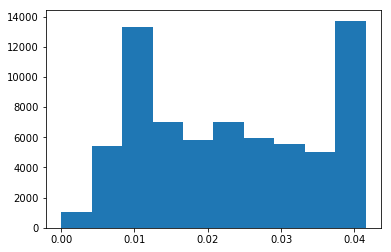

In [63]:
plt.hist(T.edepo)

In [64]:
type(x), type(T)

(dict, __main__.T_S2SiProp)

(array([  1.54800000e+03,   2.27100000e+03,   1.08890000e+04,
          3.03000000e+02,   2.70000000e+01,   1.58000000e+02,
          1.52100000e+03,   8.00000000e+00,   3.00000000e+01,
          8.26400000e+03]),
 array([  9.97347342e-06,   3.22370608e-03,   6.43743868e-03,
          9.65117128e-03,   1.28649039e-02,   1.60786365e-02,
          1.92923691e-02,   2.25061017e-02,   2.57198343e-02,
          2.89335669e-02,   3.21472995e-02]),
 <a list of 10 Patch objects>)

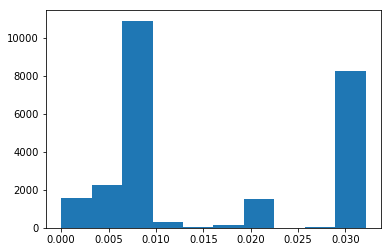

In [65]:
plt.hist(T.energies)

In [66]:
T.energies[0:20]

array([[ 0.009396 ],
       [ 0.0321473],
       [ 0.009396 ],
       [ 0.0321473],
       [ 0.009396 ],
       [ 0.0321473],
       [ 0.009396 ],
       [ 0.0054169],
       [ 0.0086871],
       [ 0.0180433],
       [ 0.009396 ],
       [ 0.0321473],
       [ 0.009396 ],
       [ 0.0321473],
       [ 0.009396 ],
       [ 0.0321473],
       [ 0.009396 ],
       [ 0.0321473],
       [ 0.009396 ],
       [ 0.0321473]], dtype=float32)

(array([ 3925.,  6221.,  7875.,  8436.,  8473.,  9038.,  8031.,  7536.,
         6249.,  4053.]),
 array([-197.82458496, -158.30831451, -118.79204407,  -79.27577362,
         -39.75950317,   -0.24323273,   39.27303772,   78.78930817,
         118.30557861,  157.82184906,  197.33811951]),
 <a list of 10 Patch objects>)

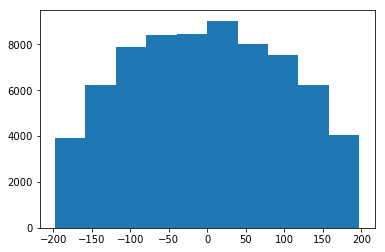

In [67]:
plt.hist(T.xposition)

(array([ 3903.,  6583.,  7277.,  8768.,  8472.,  8817.,  8551.,  7522.,
         6166.,  3778.]),
 array([ -1.97581650e+02,  -1.58050060e+02,  -1.18518469e+02,
         -7.89868790e+01,  -3.94552887e+01,   7.63015747e-02,
          3.96078918e+01,   7.91394821e+01,   1.18671072e+02,
          1.58202663e+02,   1.97734253e+02]),
 <a list of 10 Patch objects>)

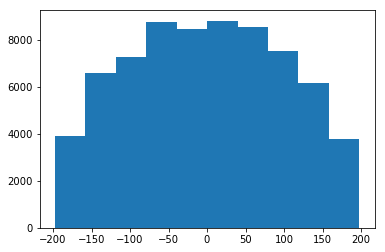

In [72]:
plt.hist(T.yposition)

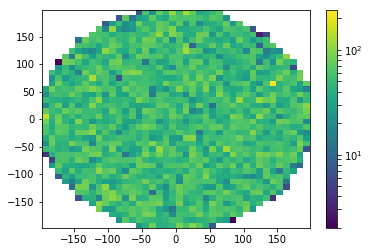

In [73]:
from matplotlib.colors import LogNorm
plt.hist2d(T.xposition, T.yposition, bins=40, norm=LogNorm())
plt.colorbar()
plt.show()